# Generalizations of a Graph-Theoretic Puzzle from *Myst IV: Revelations*

## Introduction

In the 2004 game *Myst IV: Revelations*, there is a puzzle that has the player draw a path through a series of connected lights. Each time the player selects a light, it changes color according to a predetermined sequence. The player must, by moving from light to light, make every light in the puzzle white. The only rules are that you can only move between connected lights and you cannot immediately backtrack (if you're at light A, and you move to light B, you must move to light C before you can return to light A). You can see the puzzle in action in the first few minutes of this video:

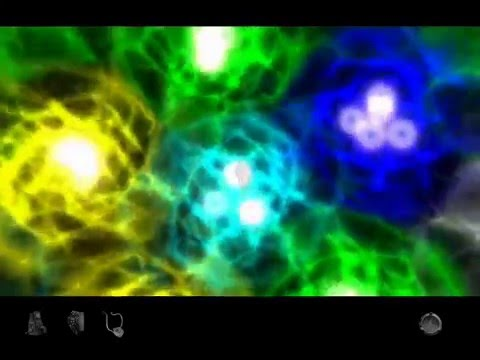

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('H4ecQHZ5VZ0')

Clearly, this puzzle can be represented by a graph where each vertex has a color attribute. We seek to generalize this puzzle and examine its structure. In particular, we want to find out:
- Given a graph, can the puzzle be solved from any starting configuration? If no, under what conditions is a puzzle solvable?
- Does a puzzle's solution space resemble any familiar mathematical objects, and if so, can we use this to better understand the puzzle?
- Given a graph and a solvable configuration, is there an efficient way to find the solution?

Currently, I'm building a database of solvable configurations for all graphs with 4, 5, 6, 7, and 8 vertices. Hopefully, this information will suggest something about the structure of the solution space that will create a path for understanding this puzzle as an abstract object.

## 0: Preliminaries

In [1]:
import myst_classes as mc

import networkx as nx
import re
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from itertools import count, product

First we read in the edge lists (for graphs with 4, 5, 6, 7, and 8 vertices) and construct networkx objects for all of the graphs:

(Edge lists are from Brendan McKay's combinatorial data webpage, http://users.cecs.anu.edu.au/~bdm/data/graphs.html)

In [2]:
graphs = pd.read_csv('all_graphs.txt')

In [3]:
graphs['Edges'] = [eval(edge_list) for edge_list in graphs['Edges']]

In [4]:
def build_graph(num_nodes, edge_list):
    G = nx.Graph()
    G.add_nodes_from(np.arange(num_nodes))
    nx.set_node_attributes(G, 0, name = 'color')
    G.add_edges_from(edge_list)
    return(G)

graphs['Graph_Objects'] = [build_graph(num_nodes, edge_list) for num_nodes, edge_list in zip(graphs['Num_Nodes'], graphs['Edges'])]

Not all graphs make for valid puzzles. An unconnected graph (where not every vertex can be reached by every other vertex) is inherently unsolvable since there are some parts of the puzzle that can't be reached, and because backtracking is forbidden, a graph that has a vertex of degree one (is only connected to one other vertex) would be unsolvable since you'd become "stuck" at that vertex. A graph that is connected and in which all vertices are of degree at least two is valid, any other graph is invalid.

The database of edge lists we've pulled from only contains connected graphs. Now, we find the minimum degree in each graph and separate out those with a minimum degree of 1:

In [5]:
def min_degree(G):
    return(min([tup[1] for tup in list(G.degree(np.arange(G.number_of_nodes())))]))

graphs['Min_Degree'] = [min_degree(G) for G in graphs['Graph_Objects']]

In [6]:
valid_graphs = graphs[graphs.Min_Degree > 1].copy()
invalid_graphs = graphs[graphs.Min_Degree == 1].copy()

Now separate the valid graphs by number of vertices:

In [7]:
four_graphs = valid_graphs[valid_graphs.Num_Nodes == 4].copy()
five_graphs = valid_graphs[valid_graphs.Num_Nodes == 5].copy()
six_graphs = valid_graphs[valid_graphs.Num_Nodes == 6].copy()
seven_graphs = valid_graphs[valid_graphs.Num_Nodes == 7].copy()
eight_graphs = valid_graphs[valid_graphs.Num_Nodes == 8].copy()

## 1: Testing

Testing 4 node graphs:

In [8]:
four_graphs

Name                                             Edges  Num_Nodes  \
3  Graph 4-4                  [(0, 2), (0, 3), (1, 2), (1, 3)]          4   
4  Graph 4-5          [(0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]          4   
5  Graph 4-6  [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]          4   

   Num_Edges Graph_Objects  Min_Degree  
3          4  (0, 1, 2, 3)           2  
4          5  (0, 1, 2, 3)           2  
5          6  (0, 1, 2, 3)           3

In [9]:
graph4_4 = mc.graph_solver(four_graphs.loc[3, 'Edges'], 4, 2)

In [11]:
graph4_6 = mc.graph_solver(four_graphs.loc[5, 'Edges'], 4, 2)

Testing five node graphs:

In [14]:
five_graphs

Name                                              Edges  Num_Nodes  \
12   Graph 5-7   [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]          5   
13   Graph 5-8  [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4...          5   
16  Graph 5-11   [(0, 2), (0, 4), (1, 3), (1, 4), (2, 4), (3, 4)]          5   
19  Graph 5-14           [(0, 2), (0, 3), (1, 3), (1, 4), (2, 4)]          5   
20  Graph 5-15   [(0, 2), (0, 3), (0, 4), (1, 3), (1, 4), (2, 4)]          5   
21  Graph 5-16  [(0, 2), (0, 3), (0, 4), (1, 3), (1, 4), (2, 4...          5   
22  Graph 5-17  [(0, 2), (0, 3), (0, 4), (1, 3), (1, 4), (2, 3...          5   
23  Graph 5-18  [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4...          5   
24  Graph 5-19  [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4...          5   
25  Graph 5-20  [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4...          5   
26  Graph 5-21  [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3...          5   

    Num_Edges    Graph_Objects  Min_Degree  
12          6  (0, 1, 2, 3, 4)           2  
13          7  (0, 1, 2, 3, 4)           2  
16          6  (0, 1, 2, 3, 4)           2  
19          5  (0, 1, 2, 3, 4)           2  
20          6  (0, 1, 2, 3, 4)           2  
21          7  (0, 1, 2, 3, 4)           2  
22          8  (0, 1, 2, 3, 4)           2  
23          7  (0, 1, 2, 3, 4)           2  
24          8  (0, 1, 2, 3, 4)           3  
25          9  (0, 1, 2, 3, 4)           3  
26         10  (0, 1, 2, 3, 4)           4

In [15]:
graph5_14 = mc.graph_solver(five_graphs.loc[19, 'Edges'], 5, 2)

Solving graph with:
Nodes: 5
Colors: 2
This graph has 32 possible configs; the threshold is 16.0

Finding solutions starting from node 0:
Current config is: Configuration (0, 0, 0, 0, 0) at node 0 from node 0
New config found!
Backtracking from node 0 to node 2
Stepping down to level 1
Current config is: Configuration (1, 0, 0, 0, 0) at node 2 from node 0
New config found!
Backtracking from node 2 to node 4
Stepping down to level 2
Current config is: Configuration (1, 0, 1, 0, 0) at node 4 from node 2
New config found!
Backtracking from node 4 to node 1
Stepping down to level 3
Current config is: Configuration (1, 0, 1, 0, 1) at node 1 from node 4
New config found!
Backtracking from node 1 to node 3
Stepping down to level 4
Current config is: Configuration (1, 1, 1, 0, 1) at node 3 from node 1
New config found!
Backtracking from node 3 to node 0
Stepping down to level 5
Current config is: Configuration (1, 1, 1, 1, 1) at node 0 from node 3
New config found!
Backtracking from node 0 to 

In [16]:
graph5_14.data

Node Solvable_Flag                                            Configs  \
0    0             1  {(1, 1, 0, 1, 0), (0, 0, 0, 0, 0), (0, 0, 1, 0...   
1    1             1  {(1, 1, 0, 1, 0), (0, 0, 0, 0, 0), (1, 1, 1, 1...   
2    2             1  {(1, 1, 0, 1, 0), (0, 0, 0, 0, 0), (1, 1, 1, 1...   
3    3             1  {(0, 0, 0, 0, 0), (1, 0, 1, 0, 0), (1, 1, 1, 0...   
4    4             1  {(1, 1, 0, 1, 0), (0, 0, 0, 0, 0), (1, 1, 1, 1...   

  Num_Configs  
0          16  
1          16  
2          16  
3          16  
4          16

In [17]:
graph5_21 = mc.graph_solver(five_graphs.loc[26, 'Edges'], 5, 2)

Solving graph with:
Nodes: 5
Colors: 2
This graph has 32 possible configs; the threshold is 16.0

Finding solutions starting from node 0:
Current config is: Configuration (0, 0, 0, 0, 0) at node 0 from node 0
New config found!
Backtracking from node 0 to node 1
Stepping down to level 1
Current config is: Configuration (1, 0, 0, 0, 0) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 2
Current config is: Configuration (1, 1, 0, 0, 0) at node 2 from node 1
New config found!
Backtracking from node 2 to node 0
Stepping down to level 3
Current config is: Configuration (1, 1, 1, 0, 0) at node 0 from node 2
New config found!
Backtracking from node 0 to node 1
Stepping down to level 4
Current config is: Configuration (0, 1, 1, 0, 0) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 5
Current config is: Configuration (0, 0, 1, 0, 0) at node 2 from node 1
New config found!
Backtracking from node 2 to 

Backtracking from node 0 to node 3
Stepping down to level 71
Current config is: Configuration (1, 0, 0, 1, 1) at node 3 from node 0
New config found!
Backtracking from node 3 to node 1
Stepping down to level 72
Current config is: Configuration (1, 0, 0, 0, 1) at node 1 from node 3
New config found!
Backtracking from node 1 to node 0
Stepping down to level 73
Current config is: Configuration (1, 1, 0, 0, 1) at node 0 from node 1
Repeat config found!
Stepping up to level 72
Backtracking from node 1 to node 2
Stepping down to level 73
Current config is: Configuration (1, 1, 0, 0, 1) at node 2 from node 1
New config found!
Backtracking from node 2 to node 0
Stepping down to level 74
Current config is: Configuration (1, 1, 1, 0, 1) at node 0 from node 2
New config found!
Backtracking from node 0 to node 1
Stepping down to level 75
Current config is: Configuration (0, 1, 1, 0, 1) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 76
Current conf

New config found!
Backtracking from node 0 to node 2
Stepping down to level 215
Current config is: Configuration (1, 1, 0, 0, 1) at node 2 from node 0
New config found!
Backtracking from node 2 to node 1
Stepping down to level 216
Current config is: Configuration (1, 1, 1, 0, 1) at node 1 from node 2
New config found!
Backtracking from node 1 to node 0
Stepping down to level 217
Current config is: Configuration (1, 0, 1, 0, 1) at node 0 from node 1
Repeat config found!
Stepping up to level 216
Backtracking from node 1 to node 3
Stepping down to level 217
Current config is: Configuration (1, 0, 1, 0, 1) at node 3 from node 1
New config found!
Backtracking from node 3 to node 0
Stepping down to level 218
Current config is: Configuration (1, 0, 1, 1, 1) at node 0 from node 3
New config found!
Backtracking from node 0 to node 1
Stepping down to level 219
Current config is: Configuration (0, 0, 1, 1, 1) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down

New config found!
Backtracking from node 1 to node 0
Stepping down to level 345
Current config is: Configuration (0, 0, 0, 1, 0) at node 0 from node 1
Repeat config found!
Stepping up to level 344
Backtracking from node 1 to node 2
Stepping down to level 345
Current config is: Configuration (0, 0, 0, 1, 0) at node 2 from node 1
Repeat config found!
Stepping up to level 344
Backtracking from node 1 to node 3
Stepping down to level 345
Current config is: Configuration (0, 0, 0, 1, 0) at node 3 from node 1
Repeat config found!
Stepping up to level 344
Stepping up to level 343
Backtracking from node 4 to node 3
Stepping down to level 344
Current config is: Configuration (0, 1, 0, 1, 0) at node 3 from node 4
New config found!
Backtracking from node 3 to node 0
Stepping down to level 345
Current config is: Configuration (0, 1, 0, 0, 0) at node 0 from node 3
Repeat config found!
Stepping up to level 344
Backtracking from node 3 to node 1
Stepping down to level 345
Current config is: Configura

Stepping down to level 352
Current config is: Configuration (1, 0, 1, 0, 0) at node 0 from node 3
Repeat config found!
Stepping up to level 351
Backtracking from node 3 to node 1
Stepping down to level 352
Current config is: Configuration (1, 0, 1, 0, 0) at node 1 from node 3
Repeat config found!
Stepping up to level 351
Backtracking from node 3 to node 2
Stepping down to level 352
Current config is: Configuration (1, 0, 1, 0, 0) at node 2 from node 3
New config found!
Backtracking from node 2 to node 0
Stepping down to level 353
Current config is: Configuration (1, 0, 0, 0, 0) at node 0 from node 2
Repeat config found!
Stepping up to level 352
Backtracking from node 2 to node 1
Stepping down to level 353
Current config is: Configuration (1, 0, 0, 0, 0) at node 1 from node 2
Repeat config found!
Stepping up to level 352
Backtracking from node 2 to node 4
Stepping down to level 353
Current config is: Configuration (1, 0, 0, 0, 0) at node 4 from node 2
New config found!
Backtracking from

Current config is: Configuration (0, 0, 0, 0, 0) at node 1 from node 0
Repeat config found!
Stepping up to level 337
Backtracking from node 0 to node 2
Stepping down to level 338
Current config is: Configuration (0, 0, 0, 0, 0) at node 2 from node 0
Repeat config found!
Stepping up to level 337
Backtracking from node 0 to node 3
Stepping down to level 338
Current config is: Configuration (0, 0, 0, 0, 0) at node 3 from node 0
New config found!
Backtracking from node 3 to node 1
Stepping down to level 339
Current config is: Configuration (0, 0, 0, 1, 0) at node 1 from node 3
Repeat config found!
Stepping up to level 338
Backtracking from node 3 to node 2
Stepping down to level 339
Current config is: Configuration (0, 0, 0, 1, 0) at node 2 from node 3
Repeat config found!
Stepping up to level 338
Backtracking from node 3 to node 4
Stepping down to level 339
Current config is: Configuration (0, 0, 0, 1, 0) at node 4 from node 3
New config found!
Backtracking from node 4 to node 0
Stepping 

Current config is: Configuration (0, 0, 0, 1, 1) at node 2 from node 4
New config found!
Backtracking from node 2 to node 0
Stepping down to level 341
Current config is: Configuration (0, 0, 1, 1, 1) at node 0 from node 2
Repeat config found!
Stepping up to level 340
Backtracking from node 2 to node 1
Stepping down to level 341
Current config is: Configuration (0, 0, 1, 1, 1) at node 1 from node 2
Repeat config found!
Stepping up to level 340
Backtracking from node 2 to node 3
Stepping down to level 341
Current config is: Configuration (0, 0, 1, 1, 1) at node 3 from node 2
New config found!
Backtracking from node 3 to node 0
Stepping down to level 342
Current config is: Configuration (0, 0, 1, 0, 1) at node 0 from node 3
Repeat config found!
Stepping up to level 341
Backtracking from node 3 to node 1
Stepping down to level 342
Current config is: Configuration (0, 0, 1, 0, 1) at node 1 from node 3
Repeat config found!
Stepping up to level 341
Backtracking from node 3 to node 4
Stepping 

Stepping up to level 235
Backtracking from node 1 to node 3
Stepping down to level 236
Current config is: Configuration (1, 0, 1, 0, 0) at node 3 from node 1
Repeat config found!
Stepping up to level 235
Backtracking from node 1 to node 4
Stepping down to level 236
Current config is: Configuration (1, 0, 1, 0, 0) at node 4 from node 1
Repeat config found!
Stepping up to level 235
Stepping up to level 234
Backtracking from node 0 to node 2
Stepping down to level 235
Current config is: Configuration (1, 1, 1, 0, 0) at node 2 from node 0
Repeat config found!
Stepping up to level 234
Backtracking from node 0 to node 3
Stepping down to level 235
Current config is: Configuration (1, 1, 1, 0, 0) at node 3 from node 0
Repeat config found!
Stepping up to level 234
Stepping up to level 233
Backtracking from node 4 to node 2
Stepping down to level 234
Current config is: Configuration (0, 1, 1, 0, 0) at node 2 from node 4
Repeat config found!
Stepping up to level 233
Backtracking from node 4 to no

Stepping down to level 97
Current config is: Configuration (0, 0, 1, 0, 0) at node 3 from node 2
Repeat config found!
Stepping up to level 96
Stepping up to level 95
Backtracking from node 4 to node 3
Stepping down to level 96
Current config is: Configuration (0, 0, 0, 0, 0) at node 3 from node 4
Repeat config found!
Stepping up to level 95
Stepping up to level 94
Stepping up to level 93
Backtracking from node 0 to node 3
Stepping down to level 94
Current config is: Configuration (0, 1, 0, 0, 1) at node 3 from node 0
Repeat config found!
Stepping up to level 93
Backtracking from node 0 to node 4
Stepping down to level 94
Current config is: Configuration (0, 1, 0, 0, 1) at node 4 from node 0
Repeat config found!
Stepping up to level 93
Stepping up to level 92
Backtracking from node 2 to node 3
Stepping down to level 93
Current config is: Configuration (1, 1, 0, 0, 1) at node 3 from node 2
Repeat config found!
Stepping up to level 92
Backtracking from node 2 to node 4
Stepping down to le

Backtracking from node 1 to node 3
Stepping down to level 18
Current config is: Configuration (0, 0, 0, 0, 0) at node 3 from node 1
Repeat config found!
Stepping up to level 17
Backtracking from node 1 to node 4
Stepping down to level 18
Current config is: Configuration (0, 0, 0, 0, 0) at node 4 from node 1
Repeat config found!
Stepping up to level 17
Stepping up to level 16
Backtracking from node 0 to node 2
Stepping down to level 17
Current config is: Configuration (0, 1, 0, 0, 0) at node 2 from node 0
Repeat config found!
Stepping up to level 16
Backtracking from node 0 to node 4
Stepping down to level 17
Current config is: Configuration (0, 1, 0, 0, 0) at node 4 from node 0
Repeat config found!
Stepping up to level 16
Stepping up to level 15
Backtracking from node 3 to node 2
Stepping down to level 16
Current config is: Configuration (1, 1, 0, 0, 0) at node 2 from node 3
Repeat config found!
Stepping up to level 15
Backtracking from node 3 to node 4
Stepping down to level 16
Curren

Repeat config found!
Stepping up to level 275
Backtracking from node 1 to node 2
Stepping down to level 276
Current config is: Configuration (0, 1, 0, 1, 0) at node 2 from node 1
Repeat config found!
Stepping up to level 275
Backtracking from node 1 to node 4
Stepping down to level 276
Current config is: Configuration (0, 1, 0, 1, 0) at node 4 from node 1
New config found!
Backtracking from node 4 to node 0
Stepping down to level 277
Current config is: Configuration (0, 1, 0, 1, 1) at node 0 from node 4
New config found!
Backtracking from node 0 to node 1
Stepping down to level 278
Current config is: Configuration (1, 1, 0, 1, 1) at node 1 from node 0
Repeat config found!
Stepping up to level 277
Backtracking from node 0 to node 2
Stepping down to level 278
Current config is: Configuration (1, 1, 0, 1, 1) at node 2 from node 0
Repeat config found!
Stepping up to level 277
Backtracking from node 0 to node 3
Stepping down to level 278
Current config is: Configuration (1, 1, 0, 1, 1) at n

Stepping up to level 326
Backtracking from node 2 to node 3
Stepping down to level 327
Current config is: Configuration (0, 1, 0, 0, 0) at node 3 from node 2
New config found!
Backtracking from node 3 to node 0
Stepping down to level 328
Current config is: Configuration (0, 1, 0, 1, 0) at node 0 from node 3
Repeat config found!
Stepping up to level 327
Backtracking from node 3 to node 1
Stepping down to level 328
Current config is: Configuration (0, 1, 0, 1, 0) at node 1 from node 3
New config found!
Backtracking from node 1 to node 0
Stepping down to level 329
Current config is: Configuration (0, 0, 0, 1, 0) at node 0 from node 1
Repeat config found!
Stepping up to level 328
Backtracking from node 1 to node 2
Stepping down to level 329
Current config is: Configuration (0, 0, 0, 1, 0) at node 2 from node 1
Repeat config found!
Stepping up to level 328
Backtracking from node 1 to node 4
Stepping down to level 329
Current config is: Configuration (0, 0, 0, 1, 0) at node 4 from node 1
New

Stepping up to level 300
Stepping up to level 299
Stepping up to level 298
Backtracking from node 4 to node 2
Stepping down to level 299
Current config is: Configuration (1, 0, 0, 1, 1) at node 2 from node 4
Repeat config found!
Stepping up to level 298
Backtracking from node 4 to node 3
Stepping down to level 299
Current config is: Configuration (1, 0, 0, 1, 1) at node 3 from node 4
Repeat config found!
Stepping up to level 298
Stepping up to level 297
Stepping up to level 296
Backtracking from node 3 to node 2
Stepping down to level 297
Current config is: Configuration (1, 1, 0, 1, 0) at node 2 from node 3
Repeat config found!
Stepping up to level 296
Backtracking from node 3 to node 4
Stepping down to level 297
Current config is: Configuration (1, 1, 0, 1, 0) at node 4 from node 3
Repeat config found!
Stepping up to level 296
Stepping up to level 295
Stepping up to level 294
Backtracking from node 4 to node 1
Stepping down to level 295
Current config is: Configuration (0, 1, 0, 0, 0

Backtracking from node 1 to node 0
Stepping down to level 323
Current config is: Configuration (1, 1, 1, 1, 1) at node 0 from node 1
Repeat config found!
Stepping up to level 322
Backtracking from node 1 to node 2
Stepping down to level 323
Current config is: Configuration (1, 1, 1, 1, 1) at node 2 from node 1
Repeat config found!
Stepping up to level 322
Backtracking from node 1 to node 4
Stepping down to level 323
Current config is: Configuration (1, 1, 1, 1, 1) at node 4 from node 1
New config found!
Backtracking from node 4 to node 0
Stepping down to level 324
Current config is: Configuration (1, 1, 1, 1, 0) at node 0 from node 4
New config found!
Backtracking from node 0 to node 1
Stepping down to level 325
Current config is: Configuration (0, 1, 1, 1, 0) at node 1 from node 0
Repeat config found!
Stepping up to level 324
Backtracking from node 0 to node 2
Stepping down to level 325
Current config is: Configuration (0, 1, 1, 1, 0) at node 2 from node 0
Repeat config found!
Steppin

Backtracking from node 3 to node 0
Stepping down to level 318
Current config is: Configuration (0, 1, 1, 0, 0) at node 0 from node 3
Repeat config found!
Stepping up to level 317
Backtracking from node 3 to node 1
Stepping down to level 318
Current config is: Configuration (0, 1, 1, 0, 0) at node 1 from node 3
Repeat config found!
Stepping up to level 317
Backtracking from node 3 to node 4
Stepping down to level 318
Current config is: Configuration (0, 1, 1, 0, 0) at node 4 from node 3
Repeat config found!
Stepping up to level 317
Stepping up to level 316
Stepping up to level 315
Stepping up to level 314
Stepping up to level 313
Stepping up to level 312
Backtracking from node 4 to node 3
Stepping down to level 313
Current config is: Configuration (0, 1, 1, 0, 1) at node 3 from node 4
Repeat config found!
Stepping up to level 312
Stepping up to level 311
Stepping up to level 310
Backtracking from node 3 to node 2
Stepping down to level 311
Current config is: Configuration (0, 0, 1, 0, 0

Stepping up to level 108
Backtracking from node 1 to node 3
Stepping down to level 109
Current config is: Configuration (0, 0, 0, 1, 0) at node 3 from node 1
Repeat config found!
Stepping up to level 108
Backtracking from node 1 to node 4
Stepping down to level 109
Current config is: Configuration (0, 0, 0, 1, 0) at node 4 from node 1
Repeat config found!
Stepping up to level 108
Stepping up to level 107
Backtracking from node 0 to node 3
Stepping down to level 108
Current config is: Configuration (0, 1, 0, 1, 0) at node 3 from node 0
Repeat config found!
Stepping up to level 107
Backtracking from node 0 to node 4
Stepping down to level 108
Current config is: Configuration (0, 1, 0, 1, 0) at node 4 from node 0
Repeat config found!
Stepping up to level 107
Stepping up to level 106
Backtracking from node 2 to node 3
Stepping down to level 107
Current config is: Configuration (1, 1, 0, 1, 0) at node 3 from node 2
Repeat config found!
Stepping up to level 106
Backtracking from node 2 to no

Backtracking from node 0 to node 1
Stepping down to level 237
Current config is: Configuration (0, 0, 1, 1, 1) at node 1 from node 0
Repeat config found!
Stepping up to level 236
Backtracking from node 0 to node 2
Stepping down to level 237
Current config is: Configuration (0, 0, 1, 1, 1) at node 2 from node 0
New config found!
Backtracking from node 2 to node 1
Stepping down to level 238
Current config is: Configuration (0, 0, 0, 1, 1) at node 1 from node 2
New config found!
Backtracking from node 1 to node 0
Stepping down to level 239
Current config is: Configuration (0, 1, 0, 1, 1) at node 0 from node 1
New config found!
Backtracking from node 0 to node 2
Stepping down to level 240
Current config is: Configuration (1, 1, 0, 1, 1) at node 2 from node 0
New config found!
Backtracking from node 2 to node 1
Stepping down to level 241
Current config is: Configuration (1, 1, 1, 1, 1) at node 1 from node 2
New config found!
Backtracking from node 1 to node 0
Stepping down to level 242
Curr

Current config is: Configuration (1, 1, 1, 0, 0) at node 1 from node 2
Repeat config found!
Stepping up to level 358
Backtracking from node 2 to node 4
Stepping down to level 359
Current config is: Configuration (1, 1, 1, 0, 0) at node 4 from node 2
New config found!
Backtracking from node 4 to node 0
Stepping down to level 360
Current config is: Configuration (1, 1, 1, 0, 1) at node 0 from node 4
Repeat config found!
Stepping up to level 359
Backtracking from node 4 to node 1
Stepping down to level 360
Current config is: Configuration (1, 1, 1, 0, 1) at node 1 from node 4
Repeat config found!
Stepping up to level 359
Backtracking from node 4 to node 3
Stepping down to level 360
Current config is: Configuration (1, 1, 1, 0, 1) at node 3 from node 4
New config found!
Backtracking from node 3 to node 0
Stepping down to level 361
Current config is: Configuration (1, 1, 1, 1, 1) at node 0 from node 3
Repeat config found!
Stepping up to level 360
Backtracking from node 3 to node 1
Stepping 

Stepping up to level 348
Stepping up to level 347
Stepping up to level 346
Backtracking from node 4 to node 3
Stepping down to level 347
Current config is: Configuration (1, 1, 1, 1, 1) at node 3 from node 4
Repeat config found!
Stepping up to level 346
Stepping up to level 345
Stepping up to level 344
Backtracking from node 3 to node 2
Stepping down to level 345
Current config is: Configuration (0, 1, 1, 1, 0) at node 2 from node 3
New config found!
Backtracking from node 2 to node 0
Stepping down to level 346
Current config is: Configuration (0, 1, 0, 1, 0) at node 0 from node 2
Repeat config found!
Stepping up to level 345
Backtracking from node 2 to node 1
Stepping down to level 346
Current config is: Configuration (0, 1, 0, 1, 0) at node 1 from node 2
Repeat config found!
Stepping up to level 345
Backtracking from node 2 to node 4
Stepping down to level 346
Current config is: Configuration (0, 1, 0, 1, 0) at node 4 from node 2
New config found!
Backtracking from node 4 to node 0
S

Repeat config found!
Stepping up to level 105
Stepping up to level 104
Stepping up to level 103
Backtracking from node 0 to node 3
Stepping down to level 104
Current config is: Configuration (0, 1, 0, 0, 1) at node 3 from node 0
Repeat config found!
Stepping up to level 103
Backtracking from node 0 to node 4
Stepping down to level 104
Current config is: Configuration (0, 1, 0, 0, 1) at node 4 from node 0
Repeat config found!
Stepping up to level 103
Stepping up to level 102
Backtracking from node 2 to node 3
Stepping down to level 103
Current config is: Configuration (1, 1, 0, 0, 1) at node 3 from node 2
Repeat config found!
Stepping up to level 102
Backtracking from node 2 to node 4
Stepping down to level 103
Current config is: Configuration (1, 1, 0, 0, 1) at node 4 from node 2
Repeat config found!
Stepping up to level 102
Stepping up to level 101
Backtracking from node 1 to node 3
Stepping down to level 102
Current config is: Configuration (1, 1, 1, 0, 1) at node 3 from node 1
Repea

Stepping up to level 252
Backtracking from node 0 to node 3
Stepping down to level 253
Current config is: Configuration (1, 0, 1, 1, 0) at node 3 from node 0
New config found!
Backtracking from node 3 to node 1
Stepping down to level 254
Current config is: Configuration (1, 0, 1, 0, 0) at node 1 from node 3
New config found!
Backtracking from node 1 to node 0
Stepping down to level 255
Current config is: Configuration (1, 1, 1, 0, 0) at node 0 from node 1
Repeat config found!
Stepping up to level 254
Backtracking from node 1 to node 2
Stepping down to level 255
Current config is: Configuration (1, 1, 1, 0, 0) at node 2 from node 1
Repeat config found!
Stepping up to level 254
Backtracking from node 1 to node 4
Stepping down to level 255
Current config is: Configuration (1, 1, 1, 0, 0) at node 4 from node 1
New config found!
Backtracking from node 4 to node 0
Stepping down to level 256
Current config is: Configuration (1, 1, 1, 0, 1) at node 0 from node 4
New config found!
Backtracking 

Current config is: Configuration (0, 0, 1, 1, 1) at node 4 from node 3
Repeat config found!
Stepping up to level 348
Stepping up to level 347
Stepping up to level 346
Stepping up to level 345
Stepping up to level 344
Stepping up to level 343
Backtracking from node 4 to node 1
Stepping down to level 344
Current config is: Configuration (1, 0, 0, 1, 0) at node 1 from node 4
Repeat config found!
Stepping up to level 343
Backtracking from node 4 to node 3
Stepping down to level 344
Current config is: Configuration (1, 0, 0, 1, 0) at node 3 from node 4
New config found!
Backtracking from node 3 to node 0
Stepping down to level 345
Current config is: Configuration (1, 0, 0, 0, 0) at node 0 from node 3
Repeat config found!
Stepping up to level 344
Backtracking from node 3 to node 1
Stepping down to level 345
Current config is: Configuration (1, 0, 0, 0, 0) at node 1 from node 3
Repeat config found!
Stepping up to level 344
Backtracking from node 3 to node 2
Stepping down to level 345
Current 

Stepping up to level 306
Backtracking from node 0 to node 4
Stepping down to level 307
Current config is: Configuration (1, 1, 1, 0, 0) at node 4 from node 0
New config found!
Backtracking from node 4 to node 1
Stepping down to level 308
Current config is: Configuration (1, 1, 1, 0, 1) at node 1 from node 4
Repeat config found!
Stepping up to level 307
Backtracking from node 4 to node 2
Stepping down to level 308
Current config is: Configuration (1, 1, 1, 0, 1) at node 2 from node 4
Repeat config found!
Stepping up to level 307
Backtracking from node 4 to node 3
Stepping down to level 308
Current config is: Configuration (1, 1, 1, 0, 1) at node 3 from node 4
Repeat config found!
Stepping up to level 307
Stepping up to level 306
Stepping up to level 305
Backtracking from node 1 to node 3
Stepping down to level 306
Current config is: Configuration (0, 1, 1, 0, 0) at node 3 from node 1
Repeat config found!
Stepping up to level 305
Backtracking from node 1 to node 4
Stepping down to level 

Stepping up to level 69
Stepping up to level 68
Backtracking from node 1 to node 3
Stepping down to level 69
Current config is: Configuration (1, 1, 0, 1, 0) at node 3 from node 1
Repeat config found!
Stepping up to level 68
Backtracking from node 1 to node 4
Stepping down to level 69
Current config is: Configuration (1, 1, 0, 1, 0) at node 4 from node 1
Repeat config found!
Stepping up to level 68
Stepping up to level 67
Backtracking from node 2 to node 3
Stepping down to level 68
Current config is: Configuration (1, 0, 0, 1, 0) at node 3 from node 2
Repeat config found!
Stepping up to level 67
Backtracking from node 2 to node 4
Stepping down to level 68
Current config is: Configuration (1, 0, 0, 1, 0) at node 4 from node 2
Repeat config found!
Stepping up to level 67
Stepping up to level 66
Backtracking from node 0 to node 3
Stepping down to level 67
Current config is: Configuration (1, 0, 1, 1, 0) at node 3 from node 0
Repeat config found!
Stepping up to level 66
Backtracking from n

Backtracking from node 2 to node 1
Stepping down to level 217
Current config is: Configuration (1, 1, 1, 0, 0) at node 1 from node 2
New config found!
Backtracking from node 1 to node 0
Stepping down to level 218
Current config is: Configuration (1, 0, 1, 0, 0) at node 0 from node 1
Repeat config found!
Stepping up to level 217
Backtracking from node 1 to node 3
Stepping down to level 218
Current config is: Configuration (1, 0, 1, 0, 0) at node 3 from node 1
New config found!
Backtracking from node 3 to node 0
Stepping down to level 219
Current config is: Configuration (1, 0, 1, 1, 0) at node 0 from node 3
New config found!
Backtracking from node 0 to node 1
Stepping down to level 220
Current config is: Configuration (0, 0, 1, 1, 0) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 221
Current config is: Configuration (0, 1, 1, 1, 0) at node 2 from node 1
New config found!
Backtracking from node 2 to node 0
Stepping down to level 222
Curr

Stepping down to level 349
Current config is: Configuration (0, 0, 1, 0, 0) at node 0 from node 2
Repeat config found!
Stepping up to level 348
Backtracking from node 2 to node 1
Stepping down to level 349
Current config is: Configuration (0, 0, 1, 0, 0) at node 1 from node 2
Repeat config found!
Stepping up to level 348
Backtracking from node 2 to node 3
Stepping down to level 349
Current config is: Configuration (0, 0, 1, 0, 0) at node 3 from node 2
New config found!
Backtracking from node 3 to node 0
Stepping down to level 350
Current config is: Configuration (0, 0, 1, 1, 0) at node 0 from node 3
Repeat config found!
Stepping up to level 349
Backtracking from node 3 to node 1
Stepping down to level 350
Current config is: Configuration (0, 0, 1, 1, 0) at node 1 from node 3
Repeat config found!
Stepping up to level 349
Backtracking from node 3 to node 4
Stepping down to level 350
Current config is: Configuration (0, 0, 1, 1, 0) at node 4 from node 3
New config found!
Backtracking from

Stepping down to level 336
Current config is: Configuration (0, 1, 1, 0, 0) at node 1 from node 3
Repeat config found!
Stepping up to level 335
Backtracking from node 3 to node 4
Stepping down to level 336
Current config is: Configuration (0, 1, 1, 0, 0) at node 4 from node 3
New config found!
Backtracking from node 4 to node 0
Stepping down to level 337
Current config is: Configuration (0, 1, 1, 0, 1) at node 0 from node 4
Repeat config found!
Stepping up to level 336
Backtracking from node 4 to node 1
Stepping down to level 337
Current config is: Configuration (0, 1, 1, 0, 1) at node 1 from node 4
Repeat config found!
Stepping up to level 336
Backtracking from node 4 to node 2
Stepping down to level 337
Current config is: Configuration (0, 1, 1, 0, 1) at node 2 from node 4
New config found!
Backtracking from node 2 to node 0
Stepping down to level 338
Current config is: Configuration (0, 1, 0, 0, 1) at node 0 from node 2
Repeat config found!
Stepping up to level 337
Backtracking from

Current config is: Configuration (0, 0, 1, 0, 1) at node 3 from node 2
Repeat config found!
Stepping up to level 97
Stepping up to level 96
Backtracking from node 4 to node 3
Stepping down to level 97
Current config is: Configuration (0, 0, 0, 0, 1) at node 3 from node 4
Repeat config found!
Stepping up to level 96
Stepping up to level 95
Stepping up to level 94
Backtracking from node 0 to node 3
Stepping down to level 95
Current config is: Configuration (0, 1, 0, 0, 0) at node 3 from node 0
Repeat config found!
Stepping up to level 94
Backtracking from node 0 to node 4
Stepping down to level 95
Current config is: Configuration (0, 1, 0, 0, 0) at node 4 from node 0
Repeat config found!
Stepping up to level 94
Stepping up to level 93
Backtracking from node 2 to node 3
Stepping down to level 94
Current config is: Configuration (1, 1, 0, 0, 0) at node 3 from node 2
Repeat config found!
Stepping up to level 93
Backtracking from node 2 to node 4
Stepping down to level 94
Current config is: 

In [18]:
graph5_21.data

Node Solvable_Flag Configs Num_Configs
0    0             0      {}           0
1    1             0      {}           0
2    2             0      {}           0
3    3             0      {}           0
4    4             0      {}           0

Testing six node graphs:

In [19]:
six_graphs[six_graphs['Num_Edges'] == 6]

Name                                             Edges  Num_Nodes  \
73  Graph 6-47  [(0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5)]          6   

    Num_Edges       Graph_Objects  Min_Degree  
73          6  (0, 1, 2, 3, 4, 5)           2

In [20]:
graph6_47 = mc.graph_solver(six_graphs.loc[73, 'Edges'], 6, 2)

Solving graph with:
Nodes: 6
Colors: 2
This graph has 64 possible configs; the threshold is 32.0

Finding solutions starting from node 0:
Current config is: Configuration (0, 0, 0, 0, 0, 0) at node 0 from node 0
New config found!
Backtracking from node 0 to node 3
Stepping down to level 1
Current config is: Configuration (1, 0, 0, 0, 0, 0) at node 3 from node 0
New config found!
Backtracking from node 3 to node 1
Stepping down to level 2
Current config is: Configuration (1, 0, 0, 1, 0, 0) at node 1 from node 3
New config found!
Backtracking from node 1 to node 5
Stepping down to level 3
Current config is: Configuration (1, 1, 0, 1, 0, 0) at node 5 from node 1
New config found!
Backtracking from node 5 to node 2
Stepping down to level 4
Current config is: Configuration (1, 1, 0, 1, 0, 1) at node 2 from node 5
New config found!
Backtracking from node 2 to node 4
Stepping down to level 5
Current config is: Configuration (1, 1, 1, 1, 0, 1) at node 4 from node 2
New config found!
Backtracki

In [21]:
graph6_47.data

Node Solvable_Flag                                            Configs  \
0    0             1  {(0, 0, 0, 0, 0, 0), (1, 0, 0, 0, 1, 0), (0, 0...   
1    1             1  {(0, 1, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0), (0, 0...   
2    2             1  {(0, 1, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0), (0, 1...   
3    3             1  {(0, 1, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0), (1, 0...   
4    4             1  {(0, 1, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0), (1, 0...   
5    5             1  {(0, 0, 0, 0, 0, 0), (1, 1, 0, 1, 1, 1), (0, 0...   

  Num_Configs  
0          20  
1          20  
2          20  
3          20  
4          20  
5          20

In [22]:
six_graphs.tail(1)

Name                                              Edges  \
138  Graph 6-112  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...   

     Num_Nodes  Num_Edges       Graph_Objects  Min_Degree  
138          6         15  (0, 1, 2, 3, 4, 5)           5

In [23]:
graph6_112 = mc.graph_solver(six_graphs.loc[138, 'Edges'], 6, 2)

Solving graph with:
Nodes: 6
Colors: 2
This graph has 64 possible configs; the threshold is 32.0

Finding solutions starting from node 0:
Current config is: Configuration (0, 0, 0, 0, 0, 0) at node 0 from node 0
New config found!
Backtracking from node 0 to node 1
Stepping down to level 1
Current config is: Configuration (1, 0, 0, 0, 0, 0) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 2
Current config is: Configuration (1, 1, 0, 0, 0, 0) at node 2 from node 1
New config found!
Backtracking from node 2 to node 0
Stepping down to level 3
Current config is: Configuration (1, 1, 1, 0, 0, 0) at node 0 from node 2
New config found!
Backtracking from node 0 to node 1
Stepping down to level 4
Current config is: Configuration (0, 1, 1, 0, 0, 0) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 5
Current config is: Configuration (0, 0, 1, 0, 0, 0) at node 2 from node 1
New config found!
Backtracki

New config found!
Backtracking from node 2 to node 0
Stepping down to level 271
Current config is: Configuration (0, 1, 1, 1, 0, 0) at node 0 from node 2
New config found!
Backtracking from node 0 to node 1
Stepping down to level 272
Current config is: Configuration (1, 1, 1, 1, 0, 0) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 273
Current config is: Configuration (1, 0, 1, 1, 0, 0) at node 2 from node 1
New config found!
Backtracking from node 2 to node 0
Stepping down to level 274
Current config is: Configuration (1, 0, 0, 1, 0, 0) at node 0 from node 2
New config found!
Backtracking from node 0 to node 1
Stepping down to level 275
Current config is: Configuration (0, 0, 0, 1, 0, 0) at node 1 from node 0
Repeat config found!
Stepping up to level 274
Backtracking from node 0 to node 3
Stepping down to level 275
Current config is: Configuration (0, 0, 0, 1, 0, 0) at node 3 from node 0
New config found!
Backtracking from node 3 to no

Current config is: Configuration (0, 1, 0, 1, 0, 1) at node 0 from node 1
New config found!
Backtracking from node 0 to node 2
Stepping down to level 394
Current config is: Configuration (1, 1, 0, 1, 0, 1) at node 2 from node 0
New config found!
Backtracking from node 2 to node 1
Stepping down to level 395
Current config is: Configuration (1, 1, 1, 1, 0, 1) at node 1 from node 2
New config found!
Backtracking from node 1 to node 0
Stepping down to level 396
Current config is: Configuration (1, 0, 1, 1, 0, 1) at node 0 from node 1
New config found!
Backtracking from node 0 to node 2
Stepping down to level 397
Current config is: Configuration (0, 0, 1, 1, 0, 1) at node 2 from node 0
New config found!
Backtracking from node 2 to node 1
Stepping down to level 398
Current config is: Configuration (0, 0, 0, 1, 0, 1) at node 1 from node 2
New config found!
Backtracking from node 1 to node 0
Stepping down to level 399
Current config is: Configuration (0, 1, 0, 1, 0, 1) at node 0 from node 1
Re

Stepping down to level 626
Current config is: Configuration (0, 0, 1, 1, 1, 1) at node 2 from node 1
Repeat config found!
Stepping up to level 625
Backtracking from node 1 to node 4
Stepping down to level 626
Current config is: Configuration (0, 0, 1, 1, 1, 1) at node 4 from node 1
New config found!
Backtracking from node 4 to node 0
Stepping down to level 627
Current config is: Configuration (0, 0, 1, 1, 0, 1) at node 0 from node 4
New config found!
Backtracking from node 0 to node 1
Stepping down to level 628
Current config is: Configuration (1, 0, 1, 1, 0, 1) at node 1 from node 0
Repeat config found!
Stepping up to level 627
Backtracking from node 0 to node 2
Stepping down to level 628
Current config is: Configuration (1, 0, 1, 1, 0, 1) at node 2 from node 0
Repeat config found!
Stepping up to level 627
Backtracking from node 0 to node 3
Stepping down to level 628
Current config is: Configuration (1, 0, 1, 1, 0, 1) at node 3 from node 0
New config found!
Backtracking from node 3 to

Repeat config found!
Stepping up to level 717
Backtracking from node 1 to node 3
Stepping down to level 718
Current config is: Configuration (0, 1, 1, 1, 1, 0) at node 3 from node 1
New config found!
Backtracking from node 3 to node 0
Stepping down to level 719
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 0 from node 3
New config found!
Backtracking from node 0 to node 1
Stepping down to level 720
Current config is: Configuration (1, 1, 1, 0, 1, 0) at node 1 from node 0
Repeat config found!
Stepping up to level 719
Backtracking from node 0 to node 2
Stepping down to level 720
Current config is: Configuration (1, 1, 1, 0, 1, 0) at node 2 from node 0
Repeat config found!
Stepping up to level 719
Backtracking from node 0 to node 4
Stepping down to level 720
Current config is: Configuration (1, 1, 1, 0, 1, 0) at node 4 from node 0
New config found!
Backtracking from node 4 to node 1
Stepping down to level 721
Current config is: Configuration (1, 1, 1, 0, 0, 0) at node 1 from

Stepping down to level 860
Current config is: Configuration (0, 1, 0, 1, 1, 1) at node 4 from node 1
New config found!
Backtracking from node 4 to node 0
Stepping down to level 861
Current config is: Configuration (0, 1, 0, 1, 0, 1) at node 0 from node 4
Repeat config found!
Stepping up to level 860
Backtracking from node 4 to node 2
Stepping down to level 861
Current config is: Configuration (0, 1, 0, 1, 0, 1) at node 2 from node 4
New config found!
Backtracking from node 2 to node 0
Stepping down to level 862
Current config is: Configuration (0, 1, 1, 1, 0, 1) at node 0 from node 2
Repeat config found!
Stepping up to level 861
Backtracking from node 2 to node 1
Stepping down to level 862
Current config is: Configuration (0, 1, 1, 1, 0, 1) at node 1 from node 2
Repeat config found!
Stepping up to level 861
Backtracking from node 2 to node 3
Stepping down to level 862
Current config is: Configuration (0, 1, 1, 1, 0, 1) at node 3 from node 2
Repeat config found!
Stepping up to level 861

Current config is: Configuration (0, 1, 1, 0, 0, 1) at node 4 from node 1
New config found!
Backtracking from node 4 to node 0
Stepping down to level 942
Current config is: Configuration (0, 1, 1, 0, 1, 1) at node 0 from node 4
New config found!
Backtracking from node 0 to node 1
Stepping down to level 943
Current config is: Configuration (1, 1, 1, 0, 1, 1) at node 1 from node 0
Repeat config found!
Stepping up to level 942
Backtracking from node 0 to node 2
Stepping down to level 943
Current config is: Configuration (1, 1, 1, 0, 1, 1) at node 2 from node 0
Repeat config found!
Stepping up to level 942
Backtracking from node 0 to node 3
Stepping down to level 943
Current config is: Configuration (1, 1, 1, 0, 1, 1) at node 3 from node 0
New config found!
Backtracking from node 3 to node 1
Stepping down to level 944
Current config is: Configuration (1, 1, 1, 1, 1, 1) at node 1 from node 3
New config found!
Backtracking from node 1 to node 0
Stepping down to level 945
Current config is: C

Stepping up to level 1061
Backtracking from node 0 to node 3
Stepping down to level 1062
Current config is: Configuration (1, 1, 0, 0, 0, 0) at node 3 from node 0
New config found!
Backtracking from node 3 to node 1
Stepping down to level 1063
Current config is: Configuration (1, 1, 0, 1, 0, 0) at node 1 from node 3
Repeat config found!
Stepping up to level 1062
Backtracking from node 3 to node 2
Stepping down to level 1063
Current config is: Configuration (1, 1, 0, 1, 0, 0) at node 2 from node 3
Repeat config found!
Stepping up to level 1062
Backtracking from node 3 to node 4
Stepping down to level 1063
Current config is: Configuration (1, 1, 0, 1, 0, 0) at node 4 from node 3
New config found!
Backtracking from node 4 to node 0
Stepping down to level 1064
Current config is: Configuration (1, 1, 0, 1, 1, 0) at node 0 from node 4
Repeat config found!
Stepping up to level 1063
Backtracking from node 4 to node 1
Stepping down to level 1064
Current config is: Configuration (1, 1, 0, 1, 1, 

Backtracking from node 5 to node 1
Stepping down to level 1106
Current config is: Configuration (1, 1, 0, 1, 0, 1) at node 1 from node 5
Repeat config found!
Stepping up to level 1105
Backtracking from node 5 to node 2
Stepping down to level 1106
Current config is: Configuration (1, 1, 0, 1, 0, 1) at node 2 from node 5
Repeat config found!
Stepping up to level 1105
Backtracking from node 5 to node 3
Stepping down to level 1106
Current config is: Configuration (1, 1, 0, 1, 0, 1) at node 3 from node 5
Repeat config found!
Stepping up to level 1105
Stepping up to level 1104
Stepping up to level 1103
Stepping up to level 1102
Backtracking from node 5 to node 3
Stepping down to level 1103
Current config is: Configuration (1, 1, 1, 1, 1, 0) at node 3 from node 5
New config found!
Backtracking from node 3 to node 0
Stepping down to level 1104
Current config is: Configuration (1, 1, 1, 0, 1, 0) at node 0 from node 3
Repeat config found!
Stepping up to level 1103
Backtracking from node 3 to nod

Repeat config found!
Stepping up to level 1158
Backtracking from node 4 to node 1
Stepping down to level 1159
Current config is: Configuration (0, 1, 0, 0, 0, 0) at node 1 from node 4
Repeat config found!
Stepping up to level 1158
Backtracking from node 4 to node 2
Stepping down to level 1159
Current config is: Configuration (0, 1, 0, 0, 0, 0) at node 2 from node 4
New config found!
Backtracking from node 2 to node 0
Stepping down to level 1160
Current config is: Configuration (0, 1, 1, 0, 0, 0) at node 0 from node 2
Repeat config found!
Stepping up to level 1159
Backtracking from node 2 to node 1
Stepping down to level 1160
Current config is: Configuration (0, 1, 1, 0, 0, 0) at node 1 from node 2
Repeat config found!
Stepping up to level 1159
Backtracking from node 2 to node 3
Stepping down to level 1160
Current config is: Configuration (0, 1, 1, 0, 0, 0) at node 3 from node 2
New config found!
Backtracking from node 3 to node 0
Stepping down to level 1161
Current config is: Configura

Stepping down to level 1140
Current config is: Configuration (0, 1, 1, 0, 1, 1) at node 5 from node 2
New config found!
Backtracking from node 5 to node 0
Stepping down to level 1141
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 0 from node 5
Repeat config found!
Stepping up to level 1140
Backtracking from node 5 to node 1
Stepping down to level 1141
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 1 from node 5
Repeat config found!
Stepping up to level 1140
Backtracking from node 5 to node 3
Stepping down to level 1141
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 3 from node 5
Repeat config found!
Stepping up to level 1140
Backtracking from node 5 to node 4
Stepping down to level 1141
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 4 from node 5
Repeat config found!
Stepping up to level 1140
Stepping up to level 1139
Stepping up to level 1138
Backtracking from node 3 to node 5
Stepping down to level 1139
Current config is: Configurat

Stepping down to level 1209
Current config is: Configuration (0, 0, 0, 0, 1, 0) at node 2 from node 3
New config found!
Backtracking from node 2 to node 0
Stepping down to level 1210
Current config is: Configuration (0, 0, 1, 0, 1, 0) at node 0 from node 2
Repeat config found!
Stepping up to level 1209
Backtracking from node 2 to node 1
Stepping down to level 1210
Current config is: Configuration (0, 0, 1, 0, 1, 0) at node 1 from node 2
Repeat config found!
Stepping up to level 1209
Backtracking from node 2 to node 4
Stepping down to level 1210
Current config is: Configuration (0, 0, 1, 0, 1, 0) at node 4 from node 2
New config found!
Backtracking from node 4 to node 0
Stepping down to level 1211
Current config is: Configuration (0, 0, 1, 0, 0, 0) at node 0 from node 4
Repeat config found!
Stepping up to level 1210
Backtracking from node 4 to node 1
Stepping down to level 1211
Current config is: Configuration (0, 0, 1, 0, 0, 0) at node 1 from node 4
Repeat config found!
Stepping up to 

New config found!
Backtracking from node 5 to node 0
Stepping down to level 1116
Current config is: Configuration (1, 0, 0, 1, 1, 1) at node 0 from node 5
New config found!
Backtracking from node 0 to node 1
Stepping down to level 1117
Current config is: Configuration (0, 0, 0, 1, 1, 1) at node 1 from node 0
Repeat config found!
Stepping up to level 1116
Backtracking from node 0 to node 2
Stepping down to level 1117
Current config is: Configuration (0, 0, 0, 1, 1, 1) at node 2 from node 0
Repeat config found!
Stepping up to level 1116
Backtracking from node 0 to node 3
Stepping down to level 1117
Current config is: Configuration (0, 0, 0, 1, 1, 1) at node 3 from node 0
Repeat config found!
Stepping up to level 1116
Backtracking from node 0 to node 4
Stepping down to level 1117
Current config is: Configuration (0, 0, 0, 1, 1, 1) at node 4 from node 0
Repeat config found!
Stepping up to level 1116
Stepping up to level 1115
Backtracking from node 5 to node 1
Stepping down to level 1116
Cu

Stepping up to level 1208
Backtracking from node 5 to node 4
Stepping down to level 1209
Current config is: Configuration (1, 0, 1, 1, 0, 0) at node 4 from node 5
New config found!
Backtracking from node 4 to node 0
Stepping down to level 1210
Current config is: Configuration (1, 0, 1, 1, 1, 0) at node 0 from node 4
Repeat config found!
Stepping up to level 1209
Backtracking from node 4 to node 1
Stepping down to level 1210
Current config is: Configuration (1, 0, 1, 1, 1, 0) at node 1 from node 4
Repeat config found!
Stepping up to level 1209
Backtracking from node 4 to node 2
Stepping down to level 1210
Current config is: Configuration (1, 0, 1, 1, 1, 0) at node 2 from node 4
Repeat config found!
Stepping up to level 1209
Backtracking from node 4 to node 3
Stepping down to level 1210
Current config is: Configuration (1, 0, 1, 1, 1, 0) at node 3 from node 4
Repeat config found!
Stepping up to level 1209
Stepping up to level 1208
Stepping up to level 1207
Stepping up to level 1206
Backt

Stepping up to level 1070
Backtracking from node 4 to node 2
Stepping down to level 1071
Current config is: Configuration (1, 1, 1, 1, 1, 0) at node 2 from node 4
Repeat config found!
Stepping up to level 1070
Backtracking from node 4 to node 5
Stepping down to level 1071
Current config is: Configuration (1, 1, 1, 1, 1, 0) at node 5 from node 4
New config found!
Backtracking from node 5 to node 0
Stepping down to level 1072
Current config is: Configuration (1, 1, 1, 1, 1, 1) at node 0 from node 5
Repeat config found!
Stepping up to level 1071
Backtracking from node 5 to node 1
Stepping down to level 1072
Current config is: Configuration (1, 1, 1, 1, 1, 1) at node 1 from node 5
New config found!
Backtracking from node 1 to node 0
Stepping down to level 1073
Current config is: Configuration (1, 0, 1, 1, 1, 1) at node 0 from node 1
Repeat config found!
Stepping up to level 1072
Backtracking from node 1 to node 2
Stepping down to level 1073
Current config is: Configuration (1, 0, 1, 1, 1, 

Backtracking from node 1 to node 5
Stepping down to level 889
Current config is: Configuration (1, 0, 1, 0, 0, 1) at node 5 from node 1
New config found!
Backtracking from node 5 to node 0
Stepping down to level 890
Current config is: Configuration (1, 0, 1, 0, 0, 0) at node 0 from node 5
Repeat config found!
Stepping up to level 889
Backtracking from node 5 to node 2
Stepping down to level 890
Current config is: Configuration (1, 0, 1, 0, 0, 0) at node 2 from node 5
Repeat config found!
Stepping up to level 889
Backtracking from node 5 to node 3
Stepping down to level 890
Current config is: Configuration (1, 0, 1, 0, 0, 0) at node 3 from node 5
Repeat config found!
Stepping up to level 889
Backtracking from node 5 to node 4
Stepping down to level 890
Current config is: Configuration (1, 0, 1, 0, 0, 0) at node 4 from node 5
Repeat config found!
Stepping up to level 889
Stepping up to level 888
Stepping up to level 887
Backtracking from node 4 to node 2
Stepping down to level 888
Curren

Backtracking from node 3 to node 4
Stepping down to level 719
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 4 from node 3
Repeat config found!
Stepping up to level 718
Backtracking from node 3 to node 5
Stepping down to level 719
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 5 from node 3
Repeat config found!
Stepping up to level 718
Stepping up to level 717
Backtracking from node 1 to node 5
Stepping down to level 718
Current config is: Configuration (0, 1, 1, 1, 1, 0) at node 5 from node 1
Repeat config found!
Stepping up to level 717
Stepping up to level 716
Backtracking from node 4 to node 2
Stepping down to level 717
Current config is: Configuration (0, 0, 1, 1, 1, 0) at node 2 from node 4
Repeat config found!
Stepping up to level 716
Backtracking from node 4 to node 3
Stepping down to level 717
Current config is: Configuration (0, 0, 1, 1, 1, 0) at node 3 from node 4
Repeat config found!
Stepping up to level 716
Backtracking from node 4 to node 5
Stepp

Stepping up to level 528
Backtracking from node 1 to node 5
Stepping down to level 529
Current config is: Configuration (0, 1, 0, 0, 1, 1) at node 5 from node 1
New config found!
Backtracking from node 5 to node 0
Stepping down to level 530
Current config is: Configuration (0, 1, 0, 0, 1, 0) at node 0 from node 5
Repeat config found!
Stepping up to level 529
Backtracking from node 5 to node 2
Stepping down to level 530
Current config is: Configuration (0, 1, 0, 0, 1, 0) at node 2 from node 5
Repeat config found!
Stepping up to level 529
Backtracking from node 5 to node 3
Stepping down to level 530
Current config is: Configuration (0, 1, 0, 0, 1, 0) at node 3 from node 5
Repeat config found!
Stepping up to level 529
Backtracking from node 5 to node 4
Stepping down to level 530
Current config is: Configuration (0, 1, 0, 0, 1, 0) at node 4 from node 5
Repeat config found!
Stepping up to level 529
Stepping up to level 528
Stepping up to level 527
Backtracking from node 0 to node 3
Stepping

Current config is: Configuration (0, 1, 0, 0, 1, 0) at node 5 from node 2
Repeat config found!
Stepping up to level 363
Stepping up to level 362
Backtracking from node 1 to node 3
Stepping down to level 363
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 3 from node 1
Repeat config found!
Stepping up to level 362
Backtracking from node 1 to node 5
Stepping down to level 363
Current config is: Configuration (0, 1, 1, 0, 1, 0) at node 5 from node 1
Repeat config found!
Stepping up to level 362
Stepping up to level 361
Backtracking from node 4 to node 2
Stepping down to level 362
Current config is: Configuration (0, 0, 1, 0, 1, 0) at node 2 from node 4
Repeat config found!
Stepping up to level 361
Backtracking from node 4 to node 3
Stepping down to level 362
Current config is: Configuration (0, 0, 1, 0, 1, 0) at node 3 from node 4
Repeat config found!
Stepping up to level 361
Backtracking from node 4 to node 5
Stepping down to level 362
Current config is: Configuration (0, 0, 

Backtracking from node 1 to node 5
Stepping down to level 247
Current config is: Configuration (0, 0, 1, 1, 1, 0) at node 5 from node 1
Repeat config found!
Stepping up to level 246
Stepping up to level 245
Backtracking from node 2 to node 3
Stepping down to level 246
Current config is: Configuration (0, 1, 1, 1, 1, 0) at node 3 from node 2
Repeat config found!
Stepping up to level 245
Backtracking from node 2 to node 4
Stepping down to level 246
Current config is: Configuration (0, 1, 1, 1, 1, 0) at node 4 from node 2
Repeat config found!
Stepping up to level 245
Backtracking from node 2 to node 5
Stepping down to level 246
Current config is: Configuration (0, 1, 1, 1, 1, 0) at node 5 from node 2
Repeat config found!
Stepping up to level 245
Stepping up to level 244
Backtracking from node 0 to node 3
Stepping down to level 245
Current config is: Configuration (0, 1, 0, 1, 1, 0) at node 3 from node 0
Repeat config found!
Stepping up to level 244
Backtracking from node 0 to node 4
Stepp

Current config is: Configuration (1, 0, 1, 1, 0, 1) at node 4 from node 0
Repeat config found!
Stepping up to level 109
Backtracking from node 0 to node 5
Stepping down to level 110
Current config is: Configuration (1, 0, 1, 1, 0, 1) at node 5 from node 0
Repeat config found!
Stepping up to level 109
Stepping up to level 108
Backtracking from node 2 to node 3
Stepping down to level 109
Current config is: Configuration (0, 0, 1, 1, 0, 1) at node 3 from node 2
Repeat config found!
Stepping up to level 108
Backtracking from node 2 to node 4
Stepping down to level 109
Current config is: Configuration (0, 0, 1, 1, 0, 1) at node 4 from node 2
Repeat config found!
Stepping up to level 108
Backtracking from node 2 to node 5
Stepping down to level 109
Current config is: Configuration (0, 0, 1, 1, 0, 1) at node 5 from node 2
Repeat config found!
Stepping up to level 108
Stepping up to level 107
Backtracking from node 1 to node 3
Stepping down to level 108
Current config is: Configuration (0, 0, 

Repeat config found!
Stepping up to level 160
Backtracking from node 1 to node 3
Stepping down to level 161
Current config is: Configuration (0, 1, 0, 0, 1, 1) at node 3 from node 1
New config found!
Backtracking from node 3 to node 0
Stepping down to level 162
Current config is: Configuration (0, 1, 0, 1, 1, 1) at node 0 from node 3
New config found!
Backtracking from node 0 to node 1
Stepping down to level 163
Current config is: Configuration (1, 1, 0, 1, 1, 1) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 164
Current config is: Configuration (1, 0, 0, 1, 1, 1) at node 2 from node 1
New config found!
Backtracking from node 2 to node 0
Stepping down to level 165
Current config is: Configuration (1, 0, 1, 1, 1, 1) at node 0 from node 2
New config found!
Backtracking from node 0 to node 1
Stepping down to level 166
Current config is: Configuration (0, 0, 1, 1, 1, 1) at node 1 from node 0
New config found!
Backtracking from node 1 to no

Stepping down to level 579
Current config is: Configuration (0, 1, 0, 1, 0, 1) at node 0 from node 3
New config found!
Backtracking from node 0 to node 1
Stepping down to level 580
Current config is: Configuration (1, 1, 0, 1, 0, 1) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 581
Current config is: Configuration (1, 0, 0, 1, 0, 1) at node 2 from node 1
New config found!
Backtracking from node 2 to node 0
Stepping down to level 582
Current config is: Configuration (1, 0, 1, 1, 0, 1) at node 0 from node 2
New config found!
Backtracking from node 0 to node 1
Stepping down to level 583
Current config is: Configuration (0, 0, 1, 1, 0, 1) at node 1 from node 0
New config found!
Backtracking from node 1 to node 2
Stepping down to level 584
Current config is: Configuration (0, 1, 1, 1, 0, 1) at node 2 from node 1
New config found!
Backtracking from node 2 to node 0
Stepping down to level 585
Current config is: Configuration (0, 1, 0, 1, 0, 

Stepping up to level 829
Backtracking from node 3 to node 2
Stepping down to level 830
Current config is: Configuration (1, 0, 1, 1, 0, 1) at node 2 from node 3
New config found!
Backtracking from node 2 to node 0
Stepping down to level 831
Current config is: Configuration (1, 0, 0, 1, 0, 1) at node 0 from node 2
Repeat config found!
Stepping up to level 830
Backtracking from node 2 to node 1
Stepping down to level 831
Current config is: Configuration (1, 0, 0, 1, 0, 1) at node 1 from node 2
Repeat config found!
Stepping up to level 830
Backtracking from node 2 to node 4
Stepping down to level 831
Current config is: Configuration (1, 0, 0, 1, 0, 1) at node 4 from node 2
New config found!
Backtracking from node 4 to node 0
Stepping down to level 832
Current config is: Configuration (1, 0, 0, 1, 1, 1) at node 0 from node 4
New config found!
Backtracking from node 0 to node 1
Stepping down to level 833
Current config is: Configuration (0, 0, 0, 1, 1, 1) at node 1 from node 0
Repeat config

Backtracking from node 3 to node 0
Stepping down to level 1046
Current config is: Configuration (1, 1, 0, 0, 1, 1) at node 0 from node 3
Repeat config found!
Stepping up to level 1045
Backtracking from node 3 to node 1
Stepping down to level 1046
Current config is: Configuration (1, 1, 0, 0, 1, 1) at node 1 from node 3
Repeat config found!
Stepping up to level 1045
Backtracking from node 3 to node 2
Stepping down to level 1046
Current config is: Configuration (1, 1, 0, 0, 1, 1) at node 2 from node 3
New config found!
Backtracking from node 2 to node 0
Stepping down to level 1047
Current config is: Configuration (1, 1, 1, 0, 1, 1) at node 0 from node 2
Repeat config found!
Stepping up to level 1046
Backtracking from node 2 to node 1
Stepping down to level 1047
Current config is: Configuration (1, 1, 1, 0, 1, 1) at node 1 from node 2
Repeat config found!
Stepping up to level 1046
Backtracking from node 2 to node 4
Stepping down to level 1047
Current config is: Configuration (1, 1, 1, 0, 

Current config is: Configuration (0, 1, 0, 1, 0, 0) at node 0 from node 2
Repeat config found!
Stepping up to level 1185
Backtracking from node 2 to node 1
Stepping down to level 1186
Current config is: Configuration (0, 1, 0, 1, 0, 0) at node 1 from node 2
Repeat config found!
Stepping up to level 1185
Backtracking from node 2 to node 3
Stepping down to level 1186
Current config is: Configuration (0, 1, 0, 1, 0, 0) at node 3 from node 2
Repeat config found!
Stepping up to level 1185
Backtracking from node 2 to node 5
Stepping down to level 1186
Current config is: Configuration (0, 1, 0, 1, 0, 0) at node 5 from node 2
New config found!
Backtracking from node 5 to node 0
Stepping down to level 1187
Current config is: Configuration (0, 1, 0, 1, 0, 1) at node 0 from node 5
Repeat config found!
Stepping up to level 1186
Backtracking from node 5 to node 1
Stepping down to level 1187
Current config is: Configuration (0, 1, 0, 1, 0, 1) at node 1 from node 5
New config found!
Backtracking from

KeyboardInterrupt: 

In [ ]:
graph6_112.data

Testing seven node graphs:

In [ ]:
seven_graphs[seven_graphs['Num_Edges'] == 7]

In [24]:
graph7_422 = mc.graph_solver(seven_graphs.loc[560, 'Edges'], 7, 2)

Solving graph with:
Nodes: 7
Colors: 2
This graph has 128 possible configs; the threshold is 64.0

Finding solutions starting from node 0:
Current config is: Configuration (0, 0, 0, 0, 0, 0, 0) at node 0 from node 0
New config found!
Backtracking from node 0 to node 3
Stepping down to level 1
Current config is: Configuration (1, 0, 0, 0, 0, 0, 0) at node 3 from node 0
New config found!
Backtracking from node 3 to node 6
Stepping down to level 2
Current config is: Configuration (1, 0, 0, 1, 0, 0, 0) at node 6 from node 3
New config found!
Backtracking from node 6 to node 2
Stepping down to level 3
Current config is: Configuration (1, 0, 0, 1, 0, 0, 1) at node 2 from node 6
New config found!
Backtracking from node 2 to node 5
Stepping down to level 4
Current config is: Configuration (1, 0, 1, 1, 0, 0, 1) at node 5 from node 2
New config found!
Backtracking from node 5 to node 1
Stepping down to level 5
Current config is: Configuration (1, 0, 1, 1, 0, 1, 1) at node 1 from node 5
New confi

In [ ]:
graph7_422.data

This is where we get a recursion depth error (default depth limit is 2000):

In [ ]:
# this crashes the ipython kernel
# sys.setrecursionlimit(4000) 

In [ ]:
seven_graphs.tail(1)

In [ ]:
# graph7_853 = mc.graph_solver(seven_graphs.loc[991, 'Edges'], 7, 2)

In [ ]:
# graph7_853.data

In [ ]:
eight_graphs[eight_graphs['Num_Edges'] == 8]

## 2: Finding Solvable Configurations

In [17]:
graphs456 = four_graphs.append(five_graphs).append(six_graphs).copy()

In [ ]:
results = pd.DataFrame(columns = ['Name', 'Nodes', 'Edges', 'Colors', 'Solvable'])

for index in graphs456.index:
    d = {}
    graph = graphs456.loc[index, :]
    d['Name'] = graph['Name']
    d['Nodes'] = graph['Num_Nodes']
    d['Edges'] = graph['Num_Edges']
    d['Colors'] = 2
    solver = mc.graph_solver(graph['Edges'], graph['Num_Nodes'], 2)
    d['Solvable'] = solver.num_solvable
    row = pd.DataFrame(data = d, index = [index])
    results = results.append(row)

In [42]:
# results.to_csv("num_solvable_2.txt")

In [9]:
results = pd.read_csv("num_solvable_2.txt")

In [10]:
results4 = results[results['Nodes'] == 4]
results4.groupby('Solvable').Solvable.count()

Solvable
14    1
16    2
Name: Solvable, dtype: int64

In [11]:
results5 = results[results['Nodes'] == 5]
results5.groupby('Solvable').Solvable.count()

Solvable
22     1
32    10
Name: Solvable, dtype: int64

In [12]:
results6 = results[results['Nodes'] == 6]
results6.groupby('Solvable').Solvable.count()

Solvable
32     1
56     1
64    59
Name: Solvable, dtype: int64

In [17]:
solver= mc.graph_solver(six_graphs.loc[51, 'Edges'], 6, 2)

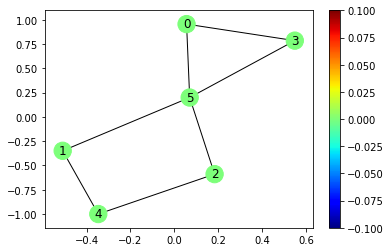

In [18]:
solver.draw_current_config()

In [19]:
solver.data

Node Solvable_Flag                                            Configs  \
0    0             0  {(0, 1, 1, 0, 0, 1), (1, 0, 0, 1, 1, 1), (0, 1...   
1    1             0  {(1, 0, 1, 0, 0, 0), (0, 1, 0, 1, 1, 0), (0, 1...   
2    2             0  {(0, 1, 1, 1, 0, 1), (1, 0, 0, 0, 1, 0), (0, 0...   
3    3             0  {(0, 1, 1, 0, 0, 1), (1, 0, 0, 1, 1, 1), (0, 1...   
4    4             0  {(0, 1, 1, 1, 0, 1), (1, 0, 0, 0, 1, 0), (1, 1...   
5    5             1  {(0, 0, 1, 0, 1, 0), (1, 0, 0, 0, 0, 0), (1, 0...   

  Num_Configs  
0          16  
1          16  
2          16  
3          16  
4          16  
5          32

In [15]:
six_graphs

Name                                              Edges  \
39    Graph 6-13  [(0, 4), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5...   
40    Graph 6-14  [(0, 4), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5...   
51    Graph 6-25  [(0, 3), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5...   
52    Graph 6-26  [(0, 3), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5...   
64    Graph 6-38  [(0, 3), (0, 4), (1, 4), (1, 5), (2, 4), (2, 5...   
65    Graph 6-39  [(0, 3), (0, 4), (1, 4), (1, 5), (2, 4), (2, 5...   
68    Graph 6-42  [(0, 3), (0, 4), (0, 5), (1, 4), (1, 5), (2, 4...   
69    Graph 6-43  [(0, 3), (0, 4), (0, 5), (1, 4), (1, 5), (2, 4...   
70    Graph 6-44  [(0, 3), (0, 4), (0, 5), (1, 4), (1, 5), (2, 4...   
71    Graph 6-45  [(0, 3), (0, 4), (0, 5), (1, 4), (1, 5), (2, 4...   
73    Graph 6-47   [(0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5)]   
74    Graph 6-48  [(0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5...   
75    Graph 6-49  [(0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5...   
79    Graph 6-53  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 4...   
80    Graph 6-54  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 4...   
81    Graph 6-55  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 4...   
82    Graph 6-56  [(0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5...   
83    Graph 6-57  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 4...   
84    Graph 6-58  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 4...   
92    Graph 6-66  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
93    Graph 6-67  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
94    Graph 6-68  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
95    Graph 6-69  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
96    Graph 6-70  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
97    Graph 6-71  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
98    Graph 6-72  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
99    Graph 6-73  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
100   Graph 6-74  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
101   Graph 6-75  [(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
102   Graph 6-76  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 5), (2, 4...   
..           ...                                                ...   
106   Graph 6-80  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 5), (2, 4...   
107   Graph 6-81  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 4), (2, 4...   
108   Graph 6-82  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
109   Graph 6-83  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
111   Graph 6-85  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
112   Graph 6-86  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
113   Graph 6-87  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
114   Graph 6-88  [(0, 2), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5...   
117   Graph 6-91  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 4), (1, 5...   
118   Graph 6-92  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 4), (1, 5...   
119   Graph 6-93  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 4), (1, 5...   
120   Graph 6-94  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 4), (1, 5...   
121   Graph 6-95  [(0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 5...   
122   Graph 6-96  [(0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 5...   
123   Graph 6-97  [(0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 5...   
124   Graph 6-98  [(0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 5...   
125   Graph 6-99  [(0, 2), (0, 3), (0, 4), (1, 3), (1, 4), (1, 5...   
126  Graph 6-100  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4...   
127  Graph 6-101  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4...   
128  Graph 6-102  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4...   
129  Graph 6-103  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4...   
130  Graph 6-104  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4...   
131  Graph 6-105  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3...   
132  Graph 6-106  [(0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3...   
133  Graph 6-107  [(0, 2), (0, 3), (

In [13]:
results6

Unnamed: 0         Name  Nodes  Edges  Colors  Solvable
14          39   Graph 6-13      6      8       2        64
15          40   Graph 6-14      6      9       2        64
16          51   Graph 6-25      6      7       2        56
17          52   Graph 6-26      6      8       2        64
18          64   Graph 6-38      6      7       2        64
19          65   Graph 6-39      6      8       2        64
20          68   Graph 6-42      6      8       2        64
21          69   Graph 6-43      6      9       2        64
22          70   Graph 6-44      6      9       2        64
23          71   Graph 6-45      6     10       2        64
24          73   Graph 6-47      6      6       2        32
25          74   Graph 6-48      6      7       2        64
26          75   Graph 6-49      6      8       2        64
27          79   Graph 6-53      6      7       2        64
28          80   Graph 6-54      6      8       2        64
29          81   Graph 6-55      6      9       2        64
30          82   Graph 6-56      6      9       2        64
31          83   Graph 6-57      6      9       2        64
32          84   Graph 6-58      6     10       2        64
33          92   Graph 6-66      6      8       2        64
34          93   Graph 6-67      6      9       2        64
35          94   Graph 6-68      6      9       2        64
36          95   Graph 6-69      6     10       2        64
37          96   Graph 6-70      6     11       2        64
38          97   Graph 6-71      6     10       2        64
39          98   Graph 6-72      6      9       2        64
40          99   Graph 6-73      6     10       2        64
41         100   Graph 6-74      6     11       2        64
42         101   Graph 6-75      6     12       2        64
43         102   Graph 6-76      6      7       2        64
..         ...          ...    ...    ...     ...       ...
45         106   Graph 6-80      6      9       2        64
46         107   Graph 6-81      6      9       2        64
47         108   Graph 6-82      6      8       2        64
48         109   Graph 6-83      6      9       2        64
49         111   Graph 6-85      6      9       2        64
50         112   Graph 6-86      6     10       2        64
51         113   Graph 6-87      6     10       2        64
52         114   Graph 6-88      6     11       2        64
53         117   Graph 6-91      6     10       2        64
54         118   Graph 6-92      6     10       2        64
55         119   Graph 6-93      6     11       2        64
56         120   Graph 6-94      6     12       2        64
57         121   Graph 6-95      6      8       2        64
58         122   Graph 6-96      6      8       2        64
59         123   Graph 6-97      6      9       2        64
60         124   Graph 6-98      6     10       2        64
61         125   Graph 6-99      6      9       2        64
62         126  Graph 6-100      6     10       2        64
63         127  Graph 6-101      6     10       2        64
64         128  Graph 6-102      6     11       2        64
65         129  Graph 6-103      6     12       2        64
66         130  Graph 6-104      6     13       2        64
67         131  Graph 6-105      6     11       2        64
68         132  Graph 6-106      6     11       2        64
69         133  Graph 6-107      6     11       2        64
70         134  Graph 6-108      6     12       2        64
71         135  Graph 6-109      6     12       2        64
72         136  Graph 6-110      6     13       2        64
73         137  Graph 6-111      6     14       2        64
74         138  Graph 6-112      6     15       2        64

[61 rows x 6 columns]

## Sandbox

In [ ]:
import sys
sys.getrecursionlimit()

In [ ]:
colors_list = [2, 3, 4, 5, 6, 7]